[[11169     0     0     0     0     0     0     0     0     0]
 [    0   162     9     6    12    28     4   135     4     0]
 [    0   143   115     0     4     6     0   125     0     0]
 [    0   156    29  2788   160   222    18   145    52     0]
 [    0     0     0    11   164    56     0     0     2     0]
 [    0   169    24    32    45  1626     5   186    10     1]
 [    2  1275   276   232   214   486  2820  1145   322     0]
 [    0   883   140    50    80    94   199   907    16     1]
 [    0     0     0     0     1     2     4     0    18     0]
 [    0    41     4    20    14    12    62    32    15  7879]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11169
           1       0.06      0.45      0.10       360
           2       0.19      0.29      0.23       393
           3       0.89      0.78      0.83      3570
           4       0.24      0.70      0.35       233
           5       0.64      0.78      0.70 

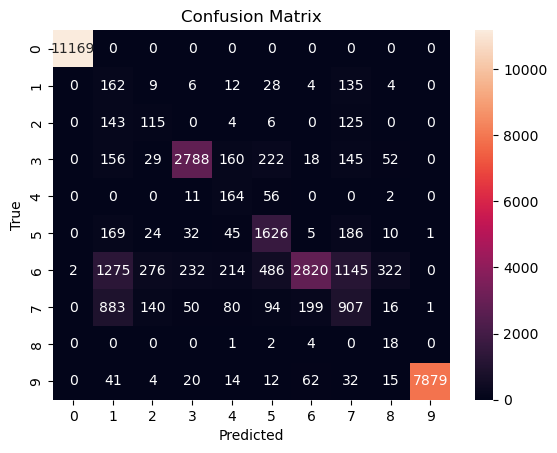

In [1]:
import sys
try:
    from imblearn.over_sampling import SMOTE  # Import SMOTE
except ImportError:
    import pip
    pip.main(['install', 'imbalanced-learn'])
    from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# Memuat dataset
data = pd.read_csv('UNSW_NB15_training-set.csv')

# Preprocessing
categorical_features = ['proto', 'service', 'state']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Mengkodekan kolom target 'attack_cat'
label_encoder = LabelEncoder()
data['attack_cat'] = label_encoder.fit_transform(data['attack_cat'])

# Menangani nilai NaN
data.dropna(inplace=True)

# Skalasi fitur numerik
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('attack_cat')
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Memisahkan data
X = data.drop(['attack_cat', 'id'], axis=1)
y = data['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling dengan SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Setup Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC(kernel='rbf', class_weight='balanced'))
])

# Evaluasi model
pipe.fit(X_train_smote, y_train_smote)
y_pred = pipe.predict(X_test)

# Menampilkan confusion matrix dan classification report
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred, zero_division=1))

# Visualisasi confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
